## Binary Classification with a Bank Churn Dataset
- to predict whether a customer continues with their account or closes it (e.g., churns)
- churn: 가입자 이탈률

---

- id
- CustomerId: A unique identifier for each customer
- Surname: The customer's surname or last name 
- CreditScore: A numerial value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance (잔액)
- Num Of Products: The number of bank products the customer uses (e.g., saving account, credit card)
- HasCrCard: Whether the customer has a credit card (1=yes, 0=no)
- isActiveMember: Whether the customer is an active member(1=yes, 0=no)
- EstimatedSalary: The estimated salary of the customer
- `Exited`: Whether the customer has churned (1=yes, 0=no)

---

- Evaluation: area under ROC curve between the predicted probability and the observed target

---

https://www.kaggle.com/code/getanmolgupta01/bank-churn-eda-catboost-lgbm-xgboost

In [ ]:
%config Completer.use_jedi = False

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# train data
df = pd.read_csv('bank_train.csv')
print(df.shape)
df.head(3)

(165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


## ① EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


- 165034 rows, 14 columns
- Surname, Geography, Gender 제외 모두 숫자형 데이터

In [4]:
# Drop unmeaningful columns: 단순 식별자 drop
cols = ['id', 'CustomerId', 'Surname']
df.drop(cols, axis=1, inplace=True)

In [5]:
print(df.shape)
df.head(3)

(165034, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


In [6]:
# Check if there's any duplicated Recrods
df.duplicated().sum()

123

In [7]:
df = df.drop_duplicates()

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [9]:
# Missing values (dropna)
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- 의미 없는 단순 식별자 drop
- 중복된 행 drop
- 결측값은 없다

In [10]:
# numerical
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000
mean,656.468914,38.124278,5.020599,55481.138955,1.554420,0.753916,0.497693,112579.798396,0.211684
std,80.091065,8.865020,2.806237,62819.233625,0.547171,0.430730,0.499996,50290.229424,0.408503
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74639.870000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,1.000000,1.000000,155155.250000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
df.Tenure.value_counts().sort_index() # 0~10 Categorical data

Tenure
0      5006
1     16745
2     18025
3     16618
4     17544
5     17250
6     15811
7     17794
8     17513
9     16701
10     5904
Name: count, dtype: int64

In [12]:
df.NumOfProducts.value_counts().sort_index() # 1~4 Categorical data

NumOfProducts
1    77323
2    84221
3     2892
4      475
Name: count, dtype: int64

In [13]:
df.describe(include="object")

,Geography,Gender
count,164911,164911
unique,3,2
top,France,Male
freq,94132,93075


### Data type !
- Numerical: CreditScore, Age, Balance, EstimatedSalary
- Categorical: Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember

### Exited

In [14]:
attrition_rate = df['Exited'].value_counts()
attrition_rate

Exited
0    130002
1     34909
Name: count, dtype: int64

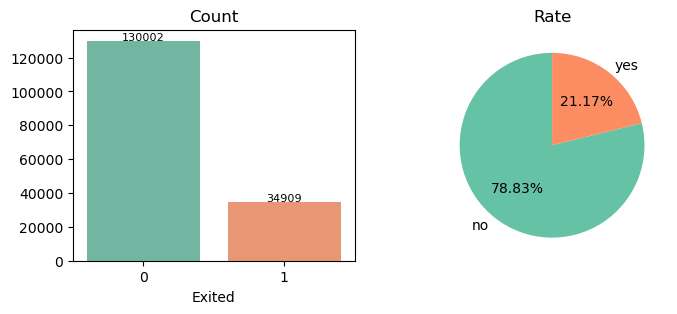

In [15]:
plt.figure(figsize=(8, 3))

# Count of 'Exited'
plt.subplot(1, 2, 1)
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='Set2')
plt.title('Count')
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha='center', fontsize=8)
    
# Rate of 'Exited'
plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', 2) # yes, no
plt.pie(attrition_rate, labels=['no', 'yes'], colors=colors,
       autopct='%.2f%%', startangle=90)
plt.title('Rate');

- yes: 34909 (21.17%)
- no: 130002 (78.83%)

#### matplotlib pie chart

    plt.pie(
    x: 'ArrayLike',
    explode: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    autopct: 'str | Callable[[float], str] | None' = None,
    pctdistance: 'float' = 0.6,
    shadow: 'bool' = False,
    labeldistance: 'float | None' = 1.1,
    startangle: 'float' = 0,
    radius: 'float' = 1,
    counterclock: 'bool' = True,
    wedgeprops: 'dict[str, Any] | None' = None,
    textprops: 'dict[str, Any] | None' = None,
    center: 'tuple[float, float]' = (0, 0),
    frame: 'bool' = False,
    rotatelabels: 'bool' = False,
    *,
    normalize: 'bool' = True,
    hatch: 'str | Sequence[str] | None' = None,
    data=None,
    )
    
    explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.


- pctdistance : float, default: 0.6
    The relative distance along the radius at which the text
    generated by *autopct* is drawn.

- textprops : dict, default: None
    Dict of arguments to pass to the text objects.

In [16]:
plt.pie?

### Categorical Data: bar + pie
- Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember

In [17]:
def categorical_plot(df, col, target_col):
    plt.figure(figsize=(10, 3))
    
    value_counts = df[col].value_counts().sort_index()
    
    # pie chart
    plt.subplot(1, 2, 1)
    colors = sns.color_palette('Set2', len(value_counts))
    plt.title(f'Distribution by {col}')
    plt.pie(value_counts.values, labels=value_counts.index, colors=colors,
           autopct='%.2f%%', startangle=90, pctdistance=0.75, textprops={'size':8})
    
    # bar plot : Attrition Rate by col
    plt.subplot(1, 2, 2)
    
    value_1 = value_counts
    value_2 = df.loc[df[target_col]==1, col].value_counts().sort_index()
    rate = np.floor((value_2/value_1)*100).values
    
    plt.title(f'Attrition by {col}')
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    for idx, value in enumerate(value_2.values):
        s = str(value) + '(' + str(int(rate[idx])) + '%)'
        plt.text(idx, value, s, ha='center', size=8)

### Gender

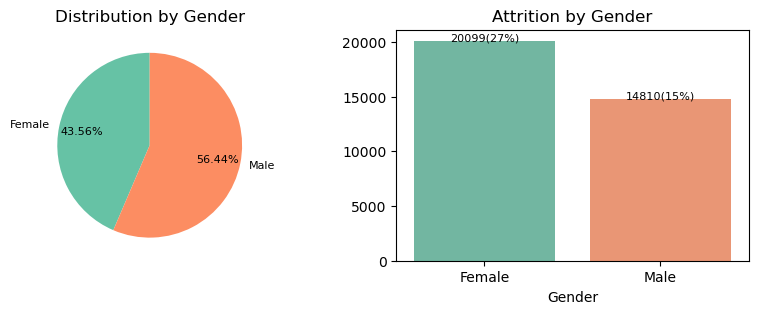

In [147]:
categorical_plot(df, 'Gender', 'Exited')

- 남성 중 15%, 여성 중 27% Exited
- Male customers accounts for a higher proportion than female customers by more than 12.6% (성별 비율)
- Attrition in female customers is higher compared to male customers

### Geography

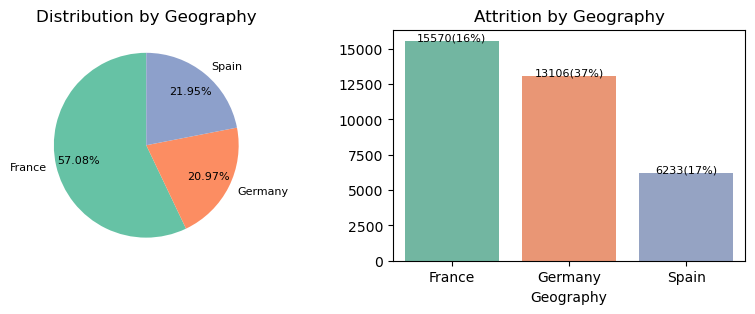

In [19]:
categorical_plot(df, 'Geography', 'Exited')

- France 중 16%, Germany 중 37%, Spain 중 17% Exited
- Most of the customers are from France i.e 56.7% (Geograpy 비율: France 높음)
- The attrition rate is very high of customers who are from Germany i.e 37%
- The attrition rate is low for customers who are from France i.e 16%

#### bar plot에서 각 category별 Exited 비율도 표기한 이유?
- Sympson's paradox

### Tenure

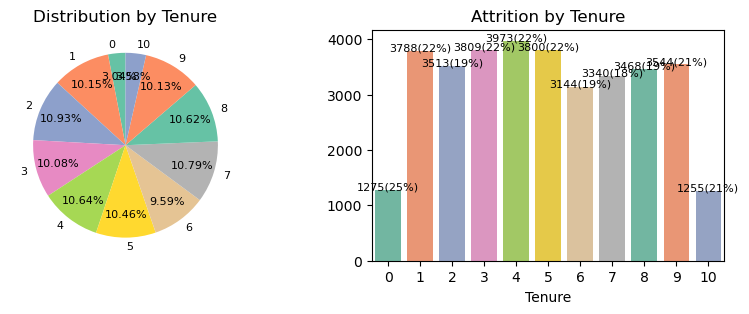

In [20]:
categorical_plot(df, 'Tenure', 'Exited')

- 0년: 전체에서 차지하는 비율은 작지만, Exited 비율은 가장 크다. (25%)
- Attribute rate is almost same in every tenure category i.e in between (19-22%) expt 0 tenure i.e highest 25%

### NumOfProducts

In [21]:
df['NumOfProducts'].value_counts().sort_index() / len(df['NumOfProducts']) * 100

NumOfProducts
1    46.887715
2    51.070577
3     1.753673
4     0.288034
Name: count, dtype: float64

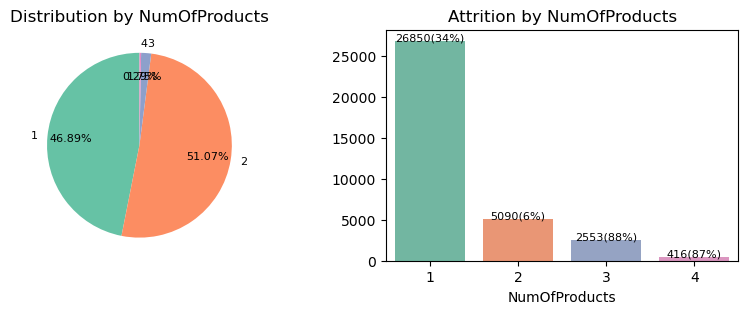

In [22]:
categorical_plot(df, 'NumOfProducts', 'Exited')

- 3, 4개의 상품을 가지고 있는 고객의 이탈 비율 매우 높다 (87%, 88%)
- 2개의 상품을 가지고 있는 고객의 이탈 비율은 매우 적다 (6%)
- 46.89% Customers have 1 product with 34% Attrition rate
- 51.07% Customers have 2 products with 6% Attrition rate 
- 1.75% Customers have 3 products with 88% Attrition rate (High Attrition rate)
- 0.28% Customers have 4 products with 87% Attrition rate (High Attrition rate)

In [23]:
print(df['NumOfProducts'].value_counts().sort_index())
print('\n')
print(df[df.Exited==1]['NumOfProducts'].value_counts().sort_index())

NumOfProducts
1    77323
2    84221
3     2892
4      475
Name: count, dtype: int64


NumOfProducts
1    26850
2     5090
3     2553
4      416
Name: count, dtype: int64


### HasCrCard

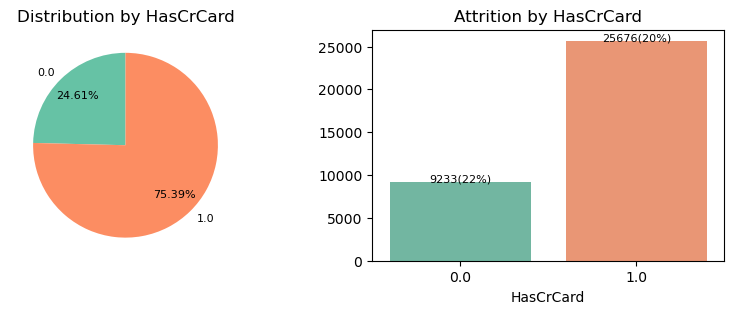

In [24]:
categorical_plot(df, 'HasCrCard', 'Exited')

- 신용카드 있는 고객이 75%로 대다수
- 신용카드 여부에 따른 Exited 차이는 거의 없음 (20%, 22%)
- 신용카드 여부가 Exited 영향 미치지는 않는 듯

### IsActiveMember

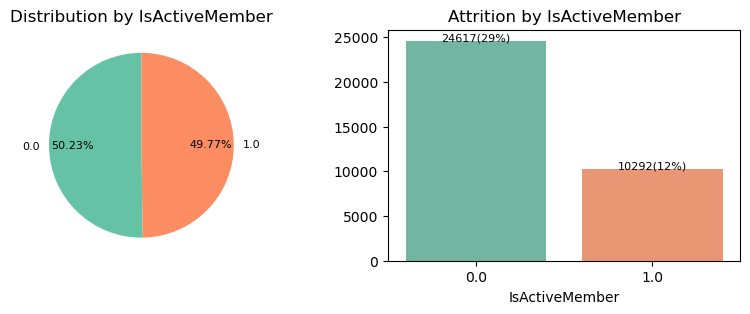

In [25]:
categorical_plot(df, 'IsActiveMember', 'Exited')

- IsActiveMember 비율은 거의 동일하다
- Active member 중 12%가 Exited
- non-Active member 중 29%가 Exited
- Not Active members are most likely to be Exited

### Numerical Data: hist + box
- CreditScore, Age, Balance, EstimatedSalary

In [26]:
def numerical_plot(df, col, target_col):
    plt.figure(figsize=(10, 3))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution by {col}')
    sns.histplot(x=col, hue=df[target_col], data=df, kde=True, palette='Set2')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Distribution by {col} & {target_col}')
    sns.boxplot(x=df[target_col], y=col, data=df, palette='Set2')

### CreditScore

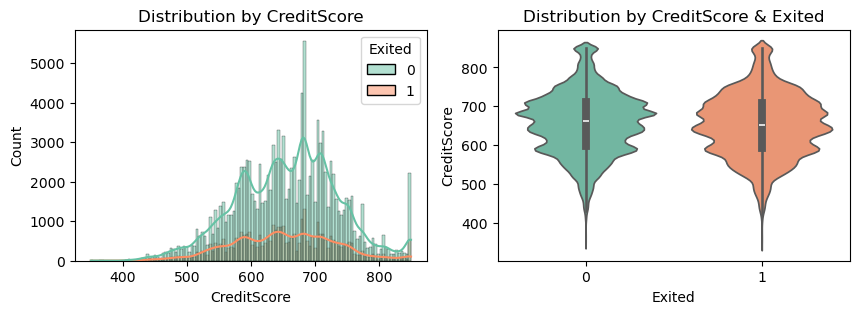

In [143]:
numerical_plot(df, 'CreditScore', 'Exited')

- Most of the customer's Credit Score are between 600 to 700
- No meaningful information for attrition is seen here

### Age

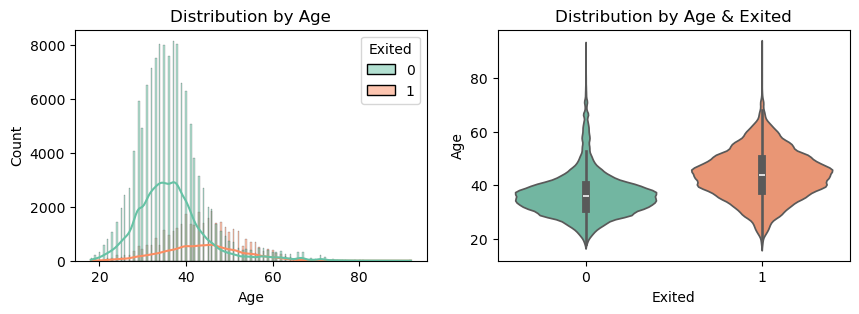

In [144]:
numerical_plot(df, 'Age', 'Exited')

In [29]:
df.groupby('Exited')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,130002.0,36.557751,8.144606,18.0,31.0,36.0,40.0,92.0
1,34909.0,43.958062,9.002932,18.0,38.0,44.0,50.0,92.0


- 나이가 많을수록 Exited 가능성이 높다
- Most of the customers are between age 30 to 40
- There is a trend that as the age is increasing, the attrition is increasing

---

- The median age of customers who left the organization is more than the customers who are working
- Customers with elder age leaves the company more compared to young employees

### Balance (계좌 잔액)

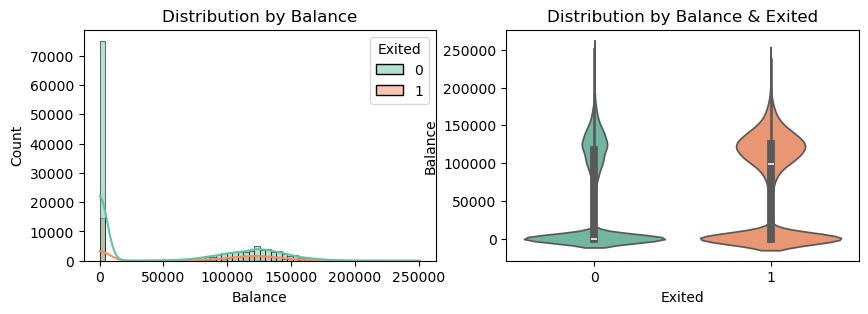

In [145]:
numerical_plot(df, 'Balance', 'Exited')

In [31]:
df.groupby('Exited')['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,130002.0,51260.077675,62191.939731,0.0,0.0,0.00,116880.53,250898.09
1,34909.0,71200.478054,62649.419633,0.0,0.0,98955.87,125437.14,238387.56


In [32]:
df[df['Balance']==0]['Exited'].value_counts()

Exited
0    75089
1    14490
Name: count, dtype: int64

- 계좌 잔액이 0인 고객 대부분은 이탈하지 않는다

### EstimatedSalary

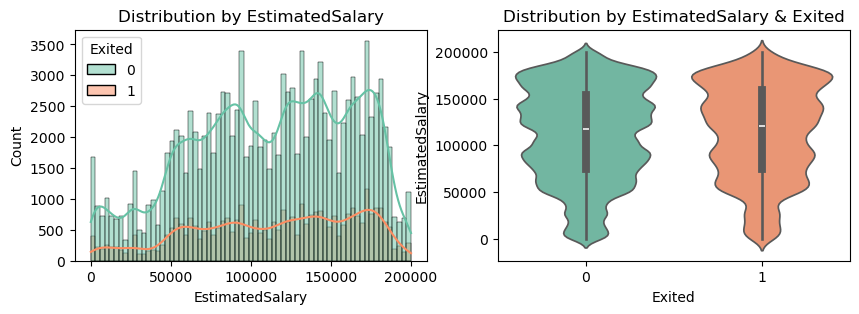

In [146]:
numerical_plot(df, 'EstimatedSalary', 'Exited')

- No meaningful information for attrition is seen here

#### Gender
- 남성 중 15%, 여성 중 27% Exited
- Male customers accounts for a higher proportion than female customers by more than 12.6% (성별 비율)
- Attrition in female customers is higher compared to male customers

---

#### Geography
- France 중 16%, Germany 중 37%, Spain 중 17% Exited
- Most of the customers are from France i.e 56.7% (Geograpy 비율: France 높음)
- The attrition rate is very high of customers who are from Germany i.e 37%
- The attrition rate is low for customers who are from France i.e 16%

---

#### Tenure
- 0년: 전체에서 차지하는 비율은 작지만, Exited 비율은 가장 크다. (25%)
- Attribute rate is almost same in every tenure category i.e in between (19-22%) expt 0 tenure i.e highest 25%

---

#### NumOfProducts
- 3, 4개의 상품을 가지고 있는 고객의 이탈 비율 매우 높다 (87%, 88%)
- 2개의 상품을 가지고 있는 고객의 이탈 비율은 매우 적다 (6%)

---

#### IsActiveMember
- IsActiveMember 비율은 거의 동일하다
- Active member 중 12%가 Exited
- non-Active member 중 29%가 Exited
- Not Active members are most likely to be Exited

----

#### Age
- 나이가 많을수록 Exited 가능성이 높다
- Most of the customers are between age 30 to 40
- There is a trend that as the age is increasing, the attrition is increasing
- The median age of customers who left the organization is more than the customers who are working
- Customers with elder age leaves the company more compared to young employees

---

#### Balance
- 계좌 잔액이 0인 고객 대부분은 이탈하지 않는다

---

#### HasCrCard & CreditScore & EstimatedSalary
- No meaningful information for attrition is seen here

In [34]:
df[['Age', 'EstimatedSalary']].corr()

,Age,EstimatedSalary
Age,1.000000,-0.005533
EstimatedSalary,-0.005533,1.000000


In [69]:
labels = ["{0}s".format(i) for i in range(10, 100, 10)]
print(labels)

df['Age_group'] = pd.cut(df['Age'], range(10, 105, 10), right=False, labels=labels) # 0~10 없음
df[:20]

['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30s
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30s
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40s
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30s
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30s
5,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1,30s
6,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0,30s
7,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0,30s
8,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0,40s
9,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0,40s


In [68]:
df.loc[df['Exited']==1, 'Age_group'].value_counts().sort_index()

Age_group
10s       34
20s     1930
30s     8796
40s    15072
50s     7424
60s     1518
70s      128
80s        6
90s        1
Name: count, dtype: int64

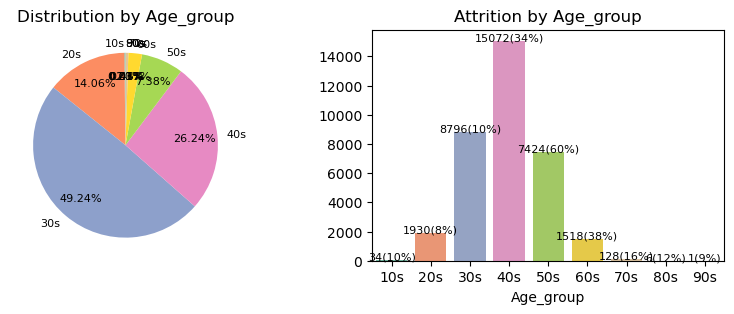

In [66]:
categorical_plot(df, 'Age_group', 'Exited')

- 40대 이탈자가 가장 많음
- 40대 중 34%가 Exited

### **1) 40대 분석을 위한 df 생성**

In [70]:
df_40 = df[df.Age_group == '40s']
df_40.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,40s
8,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0,40s
9,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0,40s
11,687,Germany,Male,40.0,3,90432.92,1,1.0,0.0,1676.92,0,40s
13,681,France,Male,47.0,5,0.00,1,1.0,1.0,72945.68,0,40s


### **2) Categorical plot**

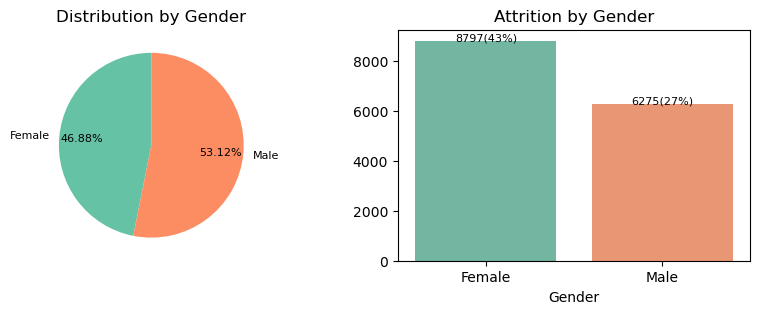

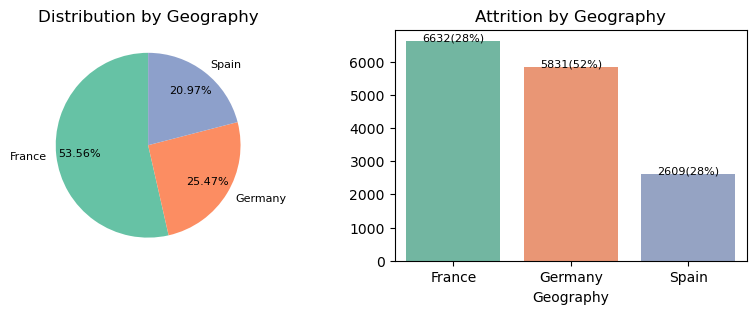

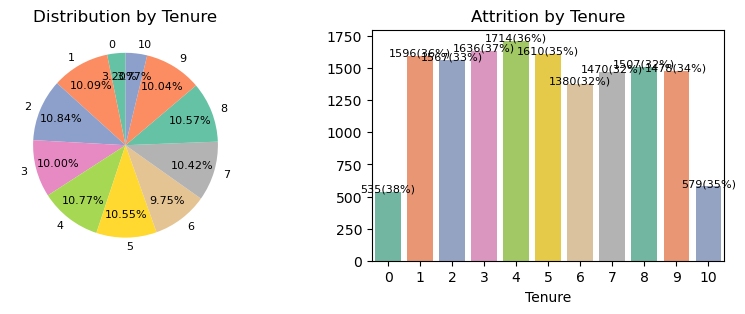

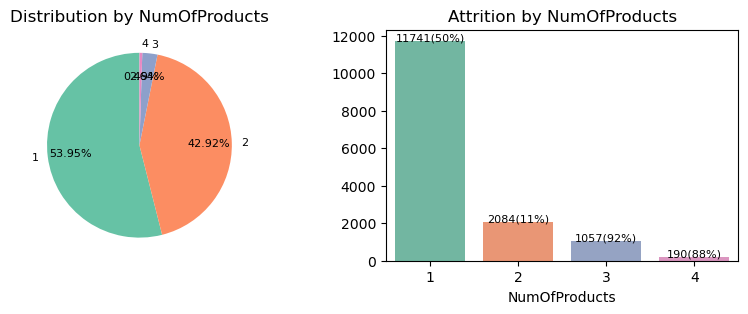

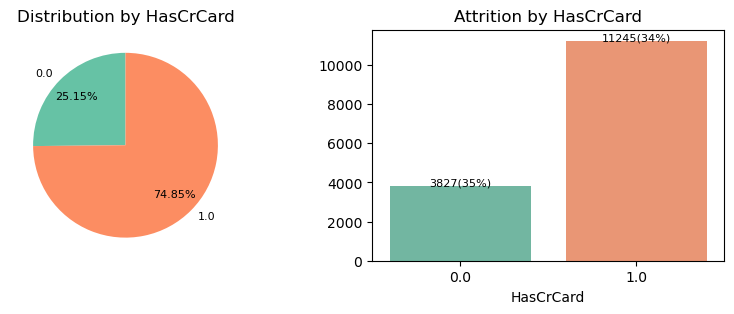

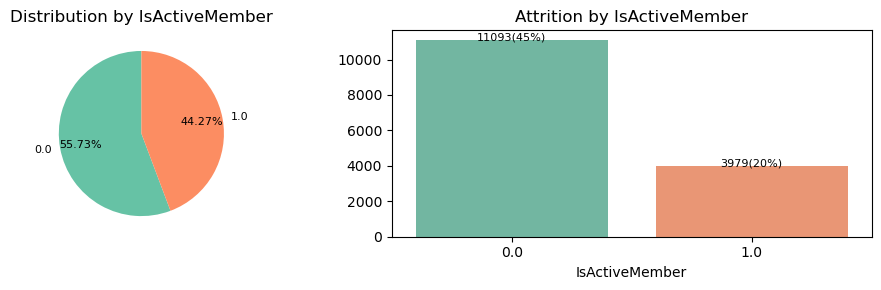

In [87]:
categorical_cols = ['Gender', 'Geography', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    categorical_plot(df_40, col, 'Exited')
plt.tight_layout()
plt.show()

- NumOfProducts는 40대 Exited에 영향을 많이 주는 듯

In [112]:
# Numofproducts, Tenure > 장기 근속 년수와 상품 수 관계
# 오랫동안 은행을 사용한 고객은 가입한 상품 수도 많지 않을까?

<Axes: xlabel='Tenure', ylabel='Count'>

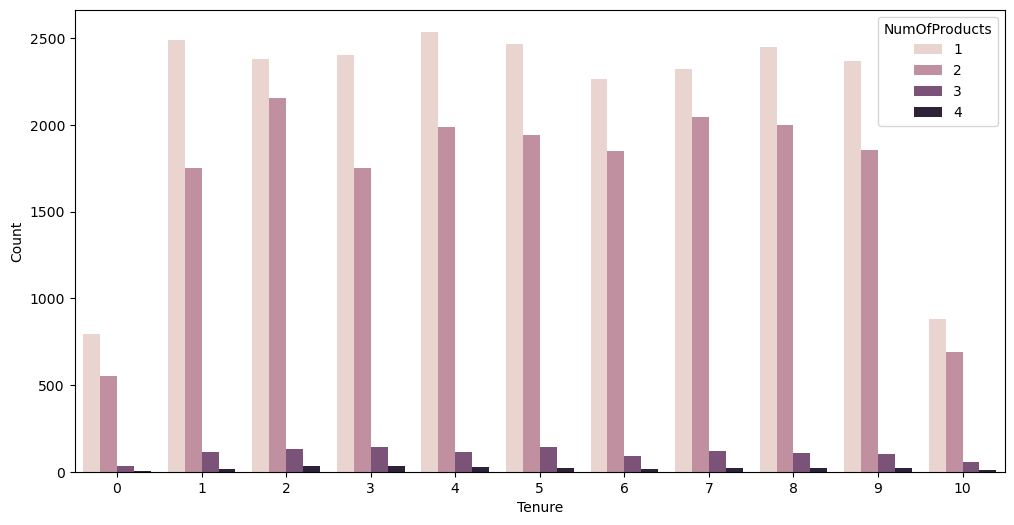

In [142]:
grouped_data = df_40.groupby(['Tenure','NumOfProducts'])['Exited'].count().reset_index()
grouped_data.rename(columns={'Exited': 'Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Tenure', y='Count', hue='NumOfProducts')

<Axes: xlabel='Tenure', ylabel='Exited'>

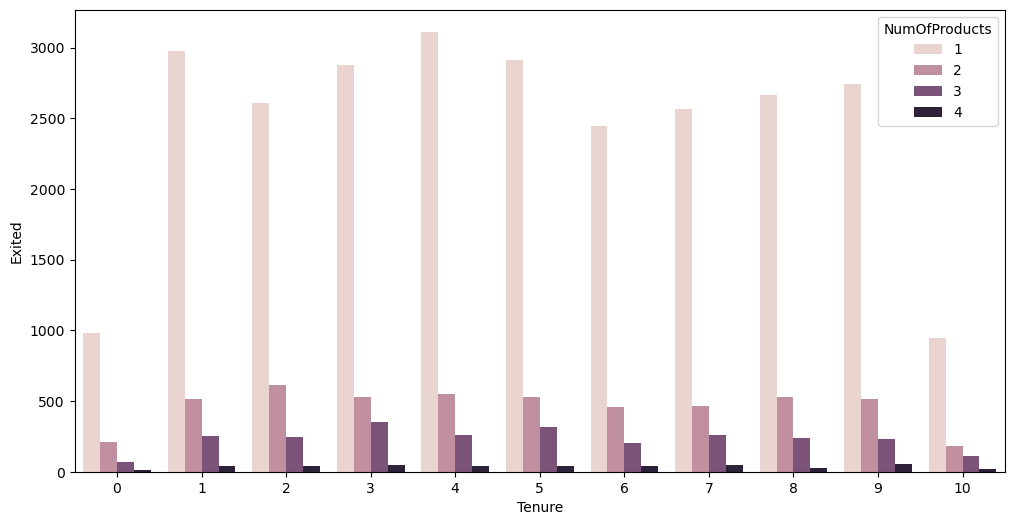

In [129]:
grouped_data = df_40.groupby(['Tenure', 'NumOfProducts'])['Exited'].sum().reset_index()
#grouped_data.rename(columns={'CreditScore': 'Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Tenure', y='Exited', hue='NumOfProducts')

In [136]:
df_40[['Tenure', 'NumOfProducts']].corr()

,Tenure,NumOfProducts
Tenure,1.000000,0.007169
NumOfProducts,0.007169,1.000000


In [118]:
df_40.groupby(['Geography', 'Tenure'])['Exited'].sum().reset_index()

,Geography,Tenure,Exited
0,France,0,235
1,France,1,674
2,France,2,681
3,France,3,731
4,France,4,747
5,France,5,731
6,France,6,612
7,France,7,647
8,France,8,659
9,France,9,655


<Axes: xlabel='Geography', ylabel='Exited'>

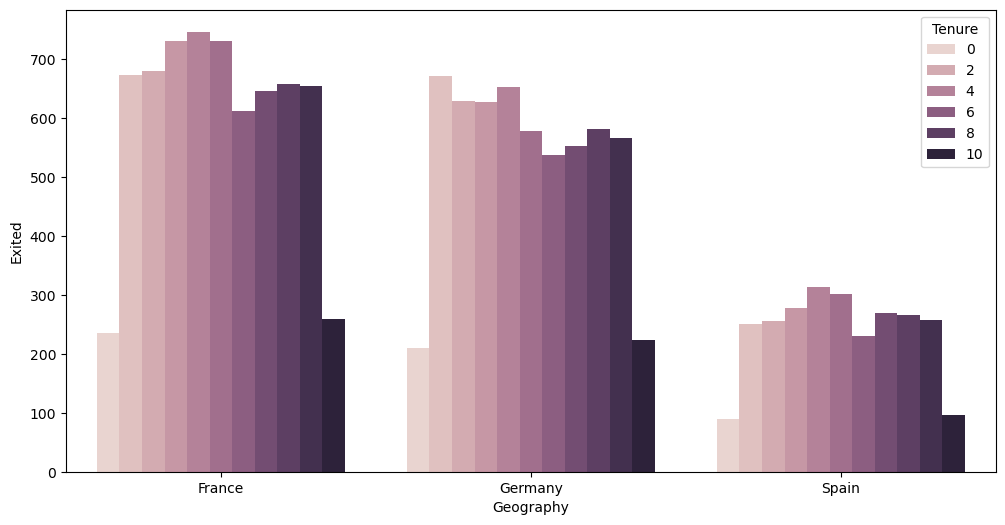

In [140]:
grouped_data = df_40.groupby(['Geography', 'Tenure'])['Exited'].sum().reset_index()
#grouped_data.rename(columns={'CreditScore': 'Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Geography', y='Exited', hue='Tenure')

ValueError: could not convert string to float: 'France'

In [121]:
df_40.groupby(['NumOfProducts', 'IsActiveMember'])['Exited'].sum().reset_index()

,NumOfProducts,IsActiveMember,Exited
0,1,0.0,8635
1,1,1.0,3106
2,2,0.0,1522
3,2,1.0,562
4,3,0.0,795
5,3,1.0,262
6,4,0.0,141
7,4,1.0,49


<Axes: xlabel='NumOfProducts', ylabel='Exited'>

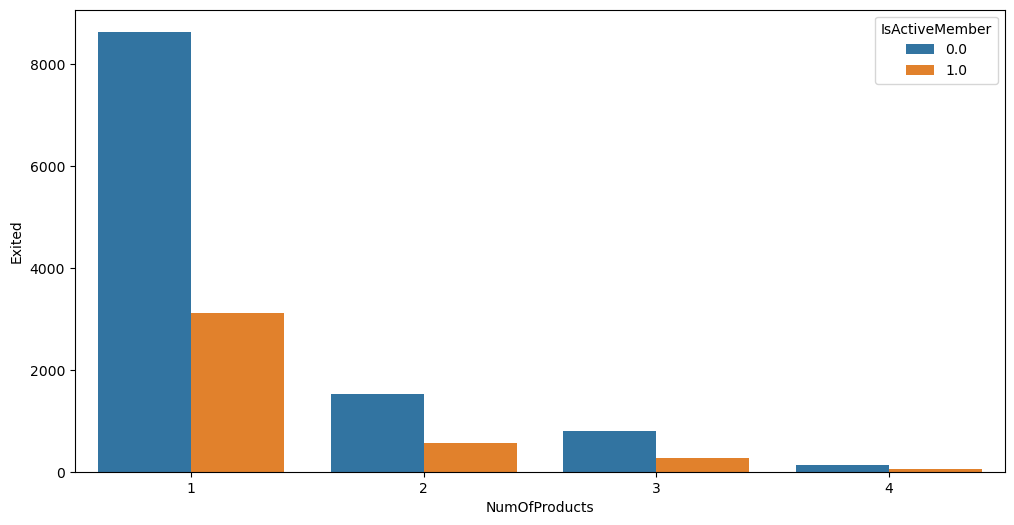

In [135]:
grouped_data = df_40.groupby(['NumOfProducts', 'IsActiveMember'])['Exited'].sum().reset_index()
#grouped_data.rename(columns={'CreditScore': 'Count'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='NumOfProducts', y='Exited', hue='IsActiveMember')

### **3) Numerical plot**

In [88]:
def numerical_plot(df, col, target_col):
    plt.figure(figsize=(10, 3))
    
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution by {col}')
    sns.histplot(x=col, hue=df[target_col], data=df, kde=True, palette='Set2')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Distribution by {col} & {target_col}')
    sns.violinplot(x=df[target_col], y=col, data=df, palette='Set2')

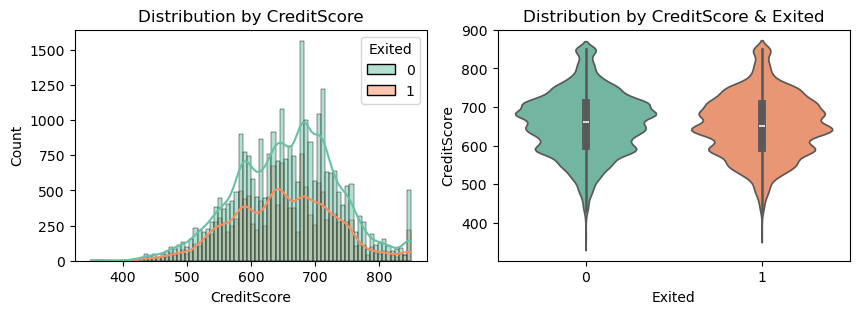

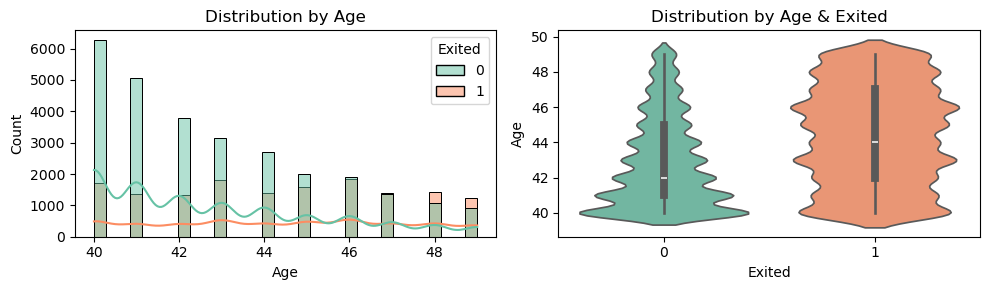

In [89]:
numerical_cols = ['CreditScore', 'Age']

for col in numerical_cols:
    numerical_plot(df_40, col, 'Exited')
plt.tight_layout()
plt.show()

- 40대 후반으로 갈수록 Exited 수가 증가하기 시작하더니 아예 Exited가 더 많아짐